## Set Up

In [232]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
pd.set_option('display.max_rows', 15)
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.10f}'.format)
pd.set_option('display.float_format', lambda x: ('%f' % x).rstrip('0').rstrip('.'))

In [233]:
df = pd.read_csv('sales_data.csv')
df.head()

,Order ID,Sale ID,Date,Order,Transaction type,Sale type,Sales channel,POS location,Billing country,Billing region,Billing city,Shipping country,Shipping region,Shipping city,Product type,Product vendor,Product,Variant,Variant SKU,Net quantity,Gross sales,Discounts,Returns,Net sales,Shipping,Taxes,Total sales
0,5539800000000,17401000000000,2024-01-01T14:06:18-05:00,#2069,product,order,Point of Sale,Boutique Site,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Brown jeans,NaN,NaN,1,5,0,0,5,0,0.3,5.3
1,5539800000000,17401000000000,2024-01-01T14:08:17-05:00,#2070,product,order,Point of Sale,Boutique Site,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Black n white body suit,NaN,NaN,1,5,0,0,5,0,0.3,5.3
2,5539800000000,17401000000000,2024-01-01T14:08:17-05:00,#2070,product,order,Point of Sale,Boutique Site,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Black halter body suit,NaN,NaN,1,5,0,0,5,0,0.3,5.3
3,5539970000000,17401500000000,2024-01-01T16:50:20-05:00,#2071,product,order,Point of Sale,Boutique Site,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sequence dress brown white tan,NaN,NaN,1,9,0,0,9,0,0.54,9.54
4,5539970000000,17401500000000,2024-01-01T16:50:20-05:00,#2071,product,order,Point of Sale,Boutique Site,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Blue wool dress with belt,NaN,NaN,1,9,0,0,9,0,0.54,9.54


## EDA

In [234]:
for col in df.columns:
    if col!='Date':
        print(f'Count of unique identifiers for {col}: {df[col].nunique()}\n')

# No column can be used as primary key

Count of unique identifiers for Order ID: 207

Count of unique identifiers for Sale ID: 172

Count of unique identifiers for Order: 230

Count of unique identifiers for Transaction type: 4

Count of unique identifiers for Sale type: 2

Count of unique identifiers for Sales channel: 3

Count of unique identifiers for POS location: 1

Count of unique identifiers for Billing country: 2

Count of unique identifiers for Billing region: 6

Count of unique identifiers for Billing city: 14

Count of unique identifiers for Shipping country: 2

Count of unique identifiers for Shipping region: 5

Count of unique identifiers for Shipping city: 5

Count of unique identifiers for Product type: 21

Count of unique identifiers for Product vendor: 12

Count of unique identifiers for Product: 270

Count of unique identifiers for Variant: 38

Count of unique identifiers for Variant SKU: 64

Count of unique identifiers for Net quantity: 5

Count of unique identifiers for Gross sales: 71

Count of unique i

In [235]:
for col in df.columns:
    if df[col].dtype == 'object' and col != 'Date' and col != 'Order':
        print(f'Unique values for {col}: {df[col].unique()} \n')

Unique values for Transaction type: ['product' 'shipping' 'unknown' 'gift_card'] 

Unique values for Sale type: ['order' 'return'] 

Unique values for Sales channel: ['Point of Sale' 'Online Store' 'Shop'] 

Unique values for POS location: ['Boutique Site' nan] 

Unique values for Billing country: [nan 'United States' 'Canada'] 

Unique values for Billing region: [nan 'Ohio' 'Arkansas' 'Kentucky' 'North Carolina' 'Ontario' 'Alabama'] 

Unique values for Billing city: [nan 'Cincinnati' 'Bryant' 'Covington' 'Independence' 'Union' 'Lexington'
 'Florence' 'Blue Ash' 'Ft. Mitchell' 'Crestview Hills' 'Charlotte'
 'Fairfield' 'Toronto' 'Daphne'] 

Unique values for Shipping country: [nan 'United States' 'Canada'] 

Unique values for Shipping region: [nan 'Ohio' 'Arkansas' 'North Carolina' 'Ontario' 'Alabama'] 

Unique values for Shipping city: [nan 'Blue Ash' 'Bryant' 'Charlotte' 'Toronto' 'Daphne'] 

Unique values for Product type: [nan 'sale' 'Athletics' '2 Piece Set' 'dresses' 'Accessories

In [236]:
# Drop Billing-related columns, POS location
df.drop(columns = ['Billing country', 'Billing region', 'Billing city', 'POS location', 'Variant SKU'], inplace=True)

C:\Users\vopq\AppData\Local\Temp\ipykernel_11288\2674100088.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_counts.index, y=missing_counts.values, palette="viridis")


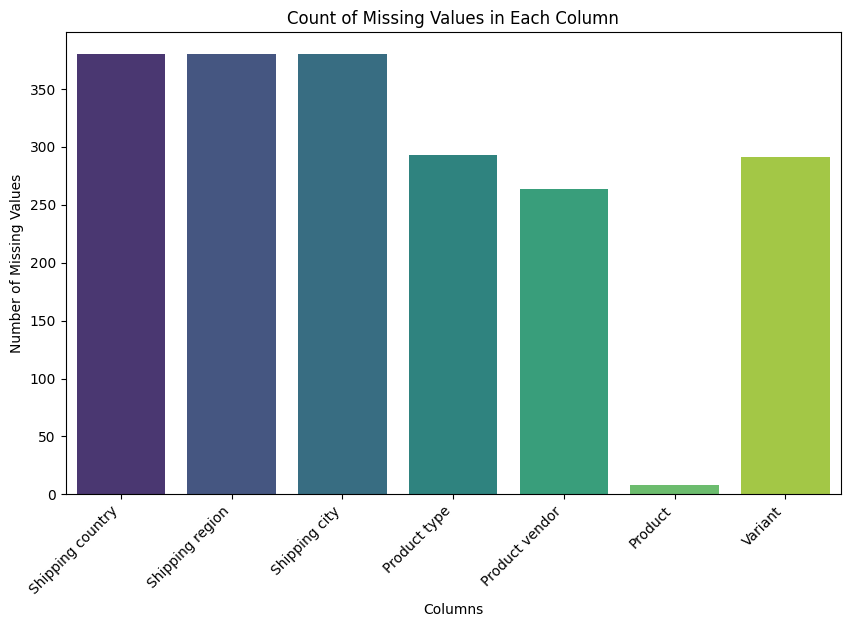

In [237]:
missing_counts = df.isna().sum()
missing_counts = missing_counts[missing_counts > 0]  # Filter only columns with missing values

plt.figure(figsize=(10, 6))
sns.barplot(x=missing_counts.index, y=missing_counts.values, palette="viridis")
plt.xticks(rotation=45, ha="right")
plt.title("Count of Missing Values in Each Column")
plt.xlabel("Columns")
plt.ylabel("Number of Missing Values")
plt.show()

In [238]:
df[(df['Gross sales'] != df['Net sales'])].head()

,Order ID,Sale ID,Date,Order,Transaction type,Sale type,Sales channel,Shipping country,Shipping region,Shipping city,Product type,Product vendor,Product,Variant,Net quantity,Gross sales,Discounts,Returns,Net sales,Shipping,Taxes,Total sales
17,5547170000000,17420000000000,2024-01-06T14:12:18-05:00,#2084,product,order,Point of Sale,NaN,NaN,NaN,NaN,NaN,Grey Hat,NaN,1,15,-3,0,12,0,0.72,12.72
30,5547370000000,17420500000000,2024-01-06T16:58:34-05:00,#2089,product,order,Point of Sale,NaN,NaN,NaN,NaN,NaN,Candy color pant jumpsuit,NaN,1,5,-5,0,0,0,0,0
64,5552290000000,17444600000000,2024-01-12T18:45:22-05:00,#2098,unknown,return,Online Store,United States,Arkansas,Bryant,NaN,NaN,NaN,NaN,0,0,0,-9,-9,0,0,-9
65,5552290000000,17441200000000,2024-01-12T18:45:22-05:00,#2098,product,return,Online Store,United States,Arkansas,Bryant,sale,Inspired Fashion 40,Sale,Large,-1,0,0,-9,-9,0,0,-9
66,5552290000000,17441200000000,2024-01-12T18:45:22-05:00,#2098,unknown,return,Online Store,United States,Arkansas,Bryant,NaN,NaN,NaN,NaN,0,0,0,9,9,0,0,9


In [239]:
df[df['Returns']!=0].head()

,Order ID,Sale ID,Date,Order,Transaction type,Sale type,Sales channel,Shipping country,Shipping region,Shipping city,Product type,Product vendor,Product,Variant,Net quantity,Gross sales,Discounts,Returns,Net sales,Shipping,Taxes,Total sales
64,5552290000000,17444600000000,2024-01-12T18:45:22-05:00,#2098,unknown,return,Online Store,United States,Arkansas,Bryant,NaN,NaN,NaN,NaN,0,0,0,-9,-9,0,0,-9
65,5552290000000,17441200000000,2024-01-12T18:45:22-05:00,#2098,product,return,Online Store,United States,Arkansas,Bryant,sale,Inspired Fashion 40,Sale,Large,-1,0,0,-9,-9,0,0,-9
66,5552290000000,17441200000000,2024-01-12T18:45:22-05:00,#2098,unknown,return,Online Store,United States,Arkansas,Bryant,NaN,NaN,NaN,NaN,0,0,0,9,9,0,0,9
244,5619390000000,17699900000000,2024-03-20T22:26:17-04:00,#2179,product,return,Point of Sale,NaN,NaN,NaN,dresses,Inspired Fashion 40,Mustard Silk Dress,Medium,-1,0,0,-63.91,-63.91,0,-3.83,-67.74
245,5619390000000,17699900000000,2024-03-20T22:26:17-04:00,#2179,product,return,Point of Sale,NaN,NaN,NaN,NaN,NaN,Lipstick,NaN,-1,0,0,-5,-5,0,-0.3,-5.3


### Clean Variant column

In [240]:
data = df['Variant'].copy()

In [241]:
size_pattern = r"(XXXL|3XL|2XL|1XL|XL|L|M|S|small|medium|large)"
color_pattern = r"(Black|Red|Green|Blue|Cream|Navy|Pink|Oatmeal|Hunter Green|Off White|Rose Pink|Light Blue)"
style_pattern = r"(Plus Size|Contemporary|Ring|Charms)"

In [242]:
def extract_variant(variant):
    if pd.isna(variant):
        return pd.Series([np.nan, np.nan, np.nan], index = ['size', 'color', 'style'])
    
    size = re.search(size_pattern, variant, re.IGNORECASE)
    color = re.search(color_pattern, variant, re.IGNORECASE)
    style = re.search(style_pattern, variant, re.IGNORECASE)

    return pd.Series([size.group(0).upper() if size else np.nan, 
                      color.group(0).capitalize() if color else np.nan, #group(0) means match the entire correction
                      style.group(0).capitalize() if style else np.nan], 
                    index=['size','color','style'])

df[['size', 'color', 'style']] = df['Variant'].apply(extract_variant)
df.drop(columns=['Variant'], inplace=True)
# df['size'] = df['size'].str.upper()

### Clean Product type

In [243]:
df['Product type'] = df['Product type'].str.capitalize()
product_type_mapping = {
    'dress': 'Dresses', 
    'bracelet': 'Accessories', 
    'earrings': 'Accessories',
    'jumpsuit': 'Jumpsuits & Rompers', 
    'jumpsuits & rompers': 'Jumpsuits & Rompers',
    'gift card': 'Gift Cards',
    'shirt': 'Shirts & tops',
    'skirts suits': 'skirts'
}

df['Product type'] = df['Product type'].str.lower().map(product_type_mapping).fillna(df['Product type'])
df['Product type'] = df['Product type'].str.capitalize()

In [244]:
sorted(df['Product type'].dropna().unique().tolist())

['2 piece set',
 'Accessories',
 'Apparel & accessories',
 'Athletics',
 'Blazers',
 'Coats & jackets',
 'Dresses',
 'Gift cards',
 'Jumpsuits & rompers',
 'Pants',
 'Sale',
 'Shirts & tops',
 'Shorts',
 'Skirt suits']

In [245]:
df[df['Product type']=='Skirt suits']

,Order ID,Sale ID,Date,Order,Transaction type,Sale type,Sales channel,Shipping country,Shipping region,Shipping city,Product type,Product vendor,Product,Net quantity,Gross sales,Discounts,Returns,Net sales,Shipping,Taxes,Total sales,size,color,style
254,5667240000000,17710000000000,2024-03-23T15:14:13-04:00,#2208,product,order,Point of Sale,NaN,NaN,NaN,Skirt suits,Inspired Fashion 40,2 Piece Baroque Style Dress Set,1,125,-62.5,0,62.5,0,3.75,66.25,L,NaN,NaN
271,5667430000000,17710600000000,2024-03-23T18:07:18-04:00,#2218,product,order,Point of Sale,NaN,NaN,NaN,Skirt suits,Inspired Fashion 40,2 Piece Baroque Style Dress Set,1,125,-62.5,0,62.5,0,3.75,66.25,M,NaN,NaN
282,5667430000000,17992700000000,2024-05-03T15:31:17-04:00,#2218,product,return,Point of Sale,NaN,NaN,NaN,Skirt suits,Inspired Fashion 40,2 Piece Baroque Style Dress Set,-1,0,0,-62.5,-62.5,0,-3.75,-66.25,M,NaN,NaN
283,5667430000000,17992700000000,2024-05-03T15:31:18-04:00,#2218,product,return,Point of Sale,NaN,NaN,NaN,Skirt suits,Inspired Fashion 40,2 Piece Baroque Style Dress Set,1,0,0,62.5,62.5,0,3.75,66.25,M,NaN,NaN
284,5667430000000,17992700000000,2024-05-03T15:31:18-04:00,#2218,product,return,Point of Sale,NaN,NaN,NaN,Skirt suits,Inspired Fashion 40,2 Piece Baroque Style Dress Set,-1,0,0,-62.5,-62.5,0,-3.75,-66.25,M,NaN,NaN


### Clean Transaction

In [246]:
df['Transaction type']=df['Transaction type'].str.capitalize()

In [247]:
df['Transaction type'].unique()

array(['Product', 'Shipping', 'Unknown', 'Gift_card'], dtype=object)

### Clean Product

In [248]:
sorted(df['Product'].dropna().unique().tolist())

['2 Piece Baroque Style Dress Set',
 '2 piece set',
 '4 Pieces for $24 Mystery Box - Inspired Box',
 '4 for $80',
 '4 pieces for $80',
 'A Colorful Jumpsuit Curvy',
 'A faux leather shirt',
 'Accessories',
 'BARBIE PRINCESS High Low Tulle Dress',
 'BLACK ORGANZA FLOWER BROOCH Accessory',
 'Bag Sale',
 'Bag sale',
 'Bead Decor Tassel Drop Earrings',
 'Black 2 piece Dress - Yolanda',
 'Black Dress - Yolanda',
 'Black Romper Shorts',
 'Black Ruffle Jacket',
 'Black Satin Silk Dress - Curvy',
 'Black body suit',
 'Black bodysuit',
 'Black business romper',
 'Black dress',
 'Black dress off shoulder flare sleeve',
 'Black halter body suit',
 'Black jumpsuit',
 'Black leather pants',
 'Black n white body suit',
 'Black pearl shirt  L',
 'Black pearl shirt s',
 'Black pearl shirt xl',
 'Black puffy sleeve dress',
 'Black rose pearl choker',
 'Black shimmer body suit',
 'Black skirt',
 'Black stretch pants',
 'Black studded ring',
 'Black tulle dress',
 'Black white diamon design dress',
 'Bla

In [249]:
product_mapping = {
    '4 pieces for $80': 'Sale Type',
    '4 for $80': 'Sale Type',
    '2 Piece Baroque Style Dress Set': 'Skirt suits Type/Baroque Style',
    'A Colorful Jumpsuit Curvy': 'Curvy Style',
    'A faux leather shirt': 'Faux Leather Style',
    'BARBIE PRINCESS High Low Tulle Dress': 'Barbie Princess High Low Tulle Style',
    'BLACK ORGANZA FLOWER BROOCH Accessory': 'Black Color/Organza Flower Brooch Style',
    'Bag Sale': 'Sale Type',
    'Bag sale': 'Sale Type',
    'Bead Decor Tassel Drop Earrings': 'Accessories Type/Bead Decor Tassel Drop Style',
    'Black 2 piece Dress - Yolanda': '2 piece set Type/Black Color/Yolanda Style',
    'Black Dress - Yolanda': 'Dresses Type/Black Color/Yolanda Style',
    'Black Romper Shorts': 'Shorts Type/Black Color/Romper Style',
    'Black Ruffle Jacket': 'Coats & jackets Type/Black Color/Ruffle Style',
    'Black Satin Silk Dress - Curvy':'Dresses Type/Black Color/Satin Silk Curvy Style',
    'Black body suit':'Bodysuit Type/Black Color',
    'Black bodysuit':'Bodysuit Type/Black Color',
    'Black business romper':'Jumpsuits & rompers Type/Black Color',
    'Black dress': 'Dresses Type/Black Color',
    'Black dress off shoulder flare sleeve':'Dresses Type/Black Color/Flare Sleeve Style',
    'Black halter body suit':'Bodysuit Type/Black Color/Halter Style',
    'Black jumpsuit': 'Jumpsuits & rompers Type/Black Color',
    'Black leather pants': 'Pants Type/Black Color/Leather Style',
    'Black n white body suit':'Bodysuit Type/Black & White Color',
    'Black pearl shirt  L':'Shirts & top Type/Black Color/Pearl Style/ L Size',
    'Black pearl shirt s': 'Shirts & top Type/Black Color/Pearl Style/ S Size',
    'Black pearl shirt xl': 'Shirts & top Type/Black Color/Pearl Style/ XL Size',
    'Black puffy sleeve dress':'Dresses Type/Black Color/Puffy Sleeve Style' ,
    'Black rose pearl choker': 'Accessories Type/Black Color/Rose Pearl Style',
    'Black shimmer body suit': 'Bodysuit Type/Black Color/Shimmer Style',
    'Black skirt': 'Skirts Type/Black Color',
    'Black stretch pants': 'Pants Type/Black Color/Stretch Style',
    'Black studded ring': 'Accessories Type/Black Color/Studded Style',
    'Black tulle dress': 'Dresses Type/Black Color/Tulle Style',
    'Black white diamon design dress': 'Dresses Type/Black & White Color/Diamond Style',
    'Black white dress': 'Dresses Type/Black & White Color',
    'Black white jump suit': 'Jumpsuits & rompers Type/Black & White Color',
    'Blazer Mini Dress': 'Dresses Type/Black Color/Mini Style',
    'Blue Dress - Yolanda': 'Dresses Type/Blue Color/Yolanda Style',
    'Blue Jean Dress - Yolanda': 'Jeans Type/Blue Color/Yolanda Style',
    'Blue Petal Earrings': 'Accessories Type/Blue Color/Petal Style',
    'Blue blazer skirt set': 'Skirt suits Type/Blue Color',
    'Blue crop top': 'Shirts & tops Type/Blue Color',
    'Blue denim white': 'Jeans Type/Blue Color/Denim Style',
    'Blue feather dress': 'Dresses Type/Blue Color/Feathure Style',
    'Blue green white dress': 'Dresses Type/Blue & Green & White Color',
    'Blue jeans': 'Jeans Type/Blue Color',
    'Blue jeans with belt': 'Jeans Type/Blue Color/With belt Style',
    'Blue jeans with cuff': 'Jeans Type/Blue Color/With cuff Style',
    'Blue lace dress': 'Dresses Type/Blue Color/Lace Style',
    'Blue mesh stretch dress': 'Dresses Type/Blue Color/Mess stretch Style',
    'Blue pearl shirt m': 'Shirts & top Type/Blue Color/Pearl Style/M Size',
    'Blue pearl shirt xl': 'Shirts & top Type/Blue Color/Pear Style/XL Size',
    'Blue stretch pants': 'Pants Type/Blue Color/Stretch Style',
    'Blue sweater top': 'Shirts & top Type/Blue Color/Sweater Style',
    'Blue wool dress with belt': 'Dresses Type/Blue Color/With belt, wool Style',
    'Blue wool zip up dress': 'Dresses Type/Blue Color/Wool Style',
    'Blue yoga': 'Yoga Type/Blue Color',
    'Blue/ cheeta print sheen jump suit': 'Jumpsuits & rompers Type/Blue Color/Cheeta print sheen Style',
    'Blue/green set': '2 piece set Type/Blue & Green Color',
    'Blue/grey striped romper': 'Jumpsuits & rompers Type/Blue & Grey Color/Striped Style',
    'Blue/teal bodysuit jumper': 'Bodysuits Type/Blue & Teal Color',
    'Blush Floral Dress - Yolanda': 'Dresses Type/Blush Floral Style',
    'Bodycon dress': 'Dresses Type/Bodycon Style',
    'Bodysuit': 'Bodysuit Type',
    'Bow pin': 'Accessories Type',
    'Bracelet': 'Accessories Type',
    'Braclet': 'Accessories Type',
    'Brown Puffy Shirt Large': 'Shirts & tops Type/Brown Color/Puffy Style/ L Size',
    'Brown Puffy Sleeve Shirt': 'Shirts & tops Type/Brown Color/Puffy Sleeve Style/ L Size',
    'Brown braclet': 'Accessories Type/Brown Color',
    'Brown charm bracelet': 'Accessories Type/Brown Color/Charm Style',
    'Brown jeans': 'Jeans Type/Brown Color',
    'Brown pants': 'Pants Type/Brown Color',
    'Brown popcorn style flare top': 'Shirts & tops Type/Brown Color/Popcorn Flare Style',
    'Brown sweater dress': 'Dresses Type/Brown Color/Sweater Style',
    'Brown/tan shorts and shirt set': '2 piece set Type/Brown Color',
    'Brownpearl skirt': 'Skirts Type/Brown Color/Pearl Style',
    'Burgundy dress': 'Dresses Type/Burgundy Style',
    'Butterfly braclet': 'Accessories Type/Butterfly Type',
    'Candy color pant jumpsuit': 'Jumpsuits & rompers Type/Candy Color',
    'Candy stripped jump suit': 'Jumpsuits & rompers Type/Candy Color/Stripped Style',
    'Candy stripped jumper': 'Jumpsuits & rompers Type/Candy Color/Stripped Style',
    'Catching Looks Pant Suit': 'Jumpsuits & rompers Type',
    'Chain link necklace with earrings': 'Accessories Type/Chain link Style',
    'Checkered scarf': 'Apparel & accessories Type/Checkered Style',
    'Cheerleader key ring': 'Accessories Type/Cheerleader Style',
    'Cream Flower Tassel Earrings':'Accessories Type/Cream Color/Flower Tassel Style',
    'Cream faux leather': 'Coats & jackets Type/Cream Color/Leater Style',
    'Cream faux leather shirt m': 'Shirts & tops Type/Cream Color/Leather Style/M Size',
    'Cream romper': 'Jumpsuits & rompers Type/Cream Color',
    'Cuff jeans':'Jeans Type/Cuff Style',
    'Cuffed Jeans': 'Jeans Type/Cuff Style',
    'Denim jacket': 'Coats & jackets Type/Denim Style',
    'Dress set': 'Dresses Type',
    'Earrings':'Accessories Type',
    'Earrings clip ons': 'Accessories Type',
    'Earrings jeweled': 'Accessories Type/Jeweled Style',
    'Effervescence Earrings': 'Accessories Type/Effervescence Style',
    'Engraved compact mirror': 'Accessories Type/Engraved Style',
    'FUNNY COWGIRL BARBIE - Hot Pink Blazer': 'Blazers Type/Hot Pink Color/Cowgirl Barbie Style',
    'Fascinator':'Fascinators & hats Type',
    'Fashion Rings': 'Accessories Type',
    'Floral style top': 'Shirts & tops Type/Floral Style',
    'Flower Belt': 'Accessories Type/Flower Style',
    'Flower Bracelet': 'Accessories Type/Flower Style',
    'Flower belt': 'Accessories Type/Flower Style',
    'Girl Hero Graphic T-Shirt': 'Shirts & tops Type/Girl Hero Style',
    'Gloves': 'Accessories Type',
    'Gold earrings': 'Accessories Type/Gold Style',
    'Gold necklace with ring': 'Accessories Type/Gold Style',
    'Gold purse earrings': 'Accessories Type/Gold purse Style',
    'Graphic Bell Sleeve Shirt': 'Shirts & tops Type/Graphic Bell Sleeve Style',
    'Graphic printed shirt': 'Shirts & tops Type/Graphic Style',
    'Gray bracelet': 'Accessories Type/Gray Color',
    'Green bell dress': 'Dresses Type/Green Color/Bell Style',
    'Green dress': 'Dresses Type/Green Color',
    'Green earrings': 'Accessories Type/Green Color',
    'Green pant suit with top green/gold': '2 piece set Type/Green Color',
    'Green romper': 'Jumpsuits & rompers Type/Green Color',
    'Green romper one shoulder': 'Jumpsuits & rompers Type/Green Color/One shoulder Style',
    'Green sheer dress': 'Dresses Type/Green Color/Sheer Style',
    'Green shirt dress': 'Dresses Type/Green Color/Shirt-dress Style',
    'Green/gold pant suit': 'Pants Type/Green Color/Gold Style',
    'Green/olive romper': 'Jumpsuits & rompers Type/Green Color/Olive Style',
    'Grey Hat': 'Fascinators & hats Type/Grey Color',
    'Grey Hat - Yolanda': 'Fascinators & hats Type/Grey Color/Yolanda Style',
    'Grey jump suit': 'Jumpsuits & rompers Type/Grey Color',
    'Halter High Low Dress Curvy': 'Dresses Type/Halter High Low Style',
    'Inspired Fashion Gift Card': 'Gift cards Type',
    'Jacket':'Coats & jackets Type',
    'Jean shorts':'Jeans Type',
    'Jeweled earring':'Accessories Type/Jeweled Style',
    'Joggers maroon':'Joggers Type/Maroon Style',
    'Kamala T shirt': 'Shirts & tops Type/Kamala Style',
    'Lace top/blue greenish': 'Shirts & tops Type/Blue & Green Color/Lace Style',
    'Leaf spaghetti strap autumn color': 'Accessories Type/Autumn Color/Leaf spaghetti Style',
    'Long Pearl Earrings': 'Accessories Type/Long Pearl Style',
    'MOCK NECK FITTED MIDI DRESS': 'Dresses Type/Mock neck fitted Style',
    'Mardi Gras Pants': 'Pants Type/Mardi Gras Style',
    'Maroon top bottom stretch': '2 piece set Type/Maroon stretch Style',
    'Mine Your Business Earrings': 'Accessories Type/Mine Your Business Style',
    'Moschino hoodie XL': 'Shirts & tops Type/Moschino hoodie Style/XL Size',
    'Multi layered tiered dress': 'Dresses Type/Multi layered tiered Style',
    'Multi-color Earrings': 'Accessories Type/Multi-color Style',
    'Mustard Silk Dress': 'Dresses Type/Mustard Silk Style',
    'Mustard Top': 'Shirts & tops Type/Mustard Style',
    'Mustard shirt': 'Shirts & tops Type/Mustard Style',
    'Mustard top': 'Shirts & tops Type/Mustard Style',
    'Necklace and Earring set': 'Accessories Type',
    'Necklace square swirl design RnJ': 'Accessories Type/Square swirl design RnJ Style',
    'Orange belly shirt': 'Shirts & tops Type/Orange Color/Belly Style',
    'Orange body suit': 'Bodysuit Type/Orange Color',
    'Orange dress': 'Dresses Type/Orange Color',
    'Orange jump suit': 'Jumpsuits & rompers Type/Orange Color',
    'Paisley Pant Set - Curvy': 'Pants Type/Paisley Style',
    'Pants': "Pants Type",
    'Pearl Gold Necklace - Yolanda':'Accessories Type/Gold Color/Pearl Yolanda Style',
    'Pearl Round Neck Puff Sleeve Ribbed Top': 'Shirts & tops Type/Pearl Round Neck Puff Sleeve Ribbed Style',
    'Pearl necklace': 'Accessories Type/Pearl Style',
    'Pearl shirt':'Shirts & tops Type/Pearl Style',
    'Pearls':'Pearl Style',
    'Pink and Green Earrings': 'Accessories Type/Pink & Green Color',
    'Pink and green earrings': 'Accessories Type/Pink & Green Color',
    'Pink bedazzle body suit': 'Bodysuits Type/Pink Color/Bedazzle Style',
    'Pink coat': 'Coats & jackets Type/Pink Color',
    'Pink earrings': 'Accessories Type/Pink Color',
    'Pink flower lace dress': 'Dresses Type/Pink Color/Flower lace Style',
    'Pink lace dress': 'Dresses Type/Pink Color/Lace Style',
    'Pink mesh dress large': 'Dresses Type/Pink Color/Mesh Style/L Size',
    'Pink redy yellow skirt with top': 'Skirt suits Type/Pink redy yellow Color',
    'Pink romper with train': 'Jumpsuits & rompers Type/Pink Color',
    'Pink skirt': 'Skirts Type/Pink Color',
    'Pink skirt xl': 'Skirts Type/Pink Color/XL Size',
    'Pink swirl jeans': 'Jeans Type/Pink Color/Swirl Style',
    'Pink top':'Shirts & tops Type/Pink Color',
    'Pink white body suit': 'Bodysuits Type/Pink & White Color',
    'Pink white star design body suit': 'Bodysuits Type/Pink & White Color/Star Style',
    'Pink white yellow blouse w/ metal ring on neck': 'Blazers Type/Pink white yellow Color/With metal ring Style',
    'Pink yellow shirt': 'Shirts & tops Type/Pink & Yellow Color',
    'Pleated Tiered Maxi Skirt': 'Skirts Type/Pleated Color/Tiered Maxi Style',
    'Plum Silk Pants': 'Pants Type/Plum silk Style',
    'Plum Silk Shirt': 'Shirts Type/Plum silk Style',
    'Prada jacket': 'Coats & jackets Type/Prada Style',
    'Printed Notched Long Sleeve Mini Dress (ONLINE ONLY)': 'Dresses Type/Printed Notched Long Sleeve Style',
    'Puffy Sleeve Shift Dress': 'Dresses Type/Puffy Sleeve Shift Style',
    'Puffy sleeve shirt': 'Shirts & tops Type/Puffy Sleeve Style',
    'R&J jewlery': 'Accessories Type/R&J jewlery Style',
    'R&j Jewlery': 'Accessories Type/R&J jewlery Style',
    'R&j jewlery set': 'Accessories Type/R&J jewlery Style',
    'Red Ball Earrings': 'Accessories Type/Red Ball Style',
    'Red Bow Tie Shirt': 'Shirts Type/Red Bow Tie Style',
    'Red Dress': 'Dresses Type/Red Color',
    'Red Fascinator': 'Fascinators & hats Type/Red Color',
    'Red Satin Earrings': 'Accessories Type/Red Satin Color',
    'Red Side Bow Mini Skirt': 'Skirts Type/Red Side Bow Style',
    'Red Velvet Gloves': 'Apparel & accessories Type/Red Velvet Color',
    'Red dress': 'Dresses Type/Red Color',
    'Red earrings': 'Accessories Type/Red Color',
    'Red flower skirt with top': 'Skirt suits Type/Red Color',
    'Red jumpsuir': 'Jumpsuits & rompers Type/Red Color',
    'Red jumpsuit': 'Jumpsuits & rompers Type/Red Color',
    'Red leopard dress': 'Dresses Type/Red Color/Leopard Style',
    'Red necklace': 'Accessories Type/Red Color',
    'Red pants with wide leg string': 'Pants Type/Red Color/Leg string Style',
    'Red skirt': 'Skirts Type/Red Color',
    'Red turtle neck': 'Accessories Type/Red Color/Turtle Style',
    'Red white black dress': 'Dresses Type/Red white black Color',
    'Red/pink dress with mid section peekaboo': 'Dresses Type/Red & Pink Color/Mid section peekaboo Style',
    'Ring': 'Accessories Type',
    'RnJ Necklace': 'Accessories Type/R&J jewlery Style',
    'RnJ bracelet': 'Accessories Type/R&J jewlery Style',
    'RnJ turtle necklace set': 'Accessories Type/R&J jewlery Style',
    'Romper brown': 'Jumpsuits & rompers Type/Brown Color',
    'SALE':'Sale Type',
    'Sale':'Sale Type',
    'Satin Wide Leg Pants':'Pants Type/Satin Wide Leg Style',
    'Scarf': 'Apparel & accessories Type',
    'Sequence dress brown white tan':'Dresses Type/Brown & White Color',
    'Short Set - Cream Curvy':'Shorts Type/Cream Color/Curvy Style',
    'Short set':'Shorts Type',
    'Shorts jeans':'Shorts Type/Jeans Style',
    'Silk Blazer Jacket':'Blazers Type/Silk Style',
    'Silk Suit Shorts':'Shorts Type/Silk Style',
    'Silver bracelet':'Accessories Type/Silver Color',
    'Silver pants':'Pants Type/Silver Color',
    'Silver r&j necklace':'Accessories Type/Silver Color/R&J Style',
    'Smooch Acrylic Dangles -Earrings':'Accessories Type/Smooch Acrylic Dangles Style',
    'Tan bracelet':'Accessories Type/Tan Color',
    'Tan jeans':'Jeans Type/Tan Color',
    'Teal Dress - Yolanda':'Dresses Type/Teal Color/Yolanda Style',
    'Teal blue body suit':'Bodysuits Type/Teal & Blue Color',
    'Thigh High Stockings - Yolanda':'Accessories Type/Yolanda Style',
    'Tulle Halter Top':'Shirts & tops Type/Tulle Halter Style',
    'Two piece beach set':'2 piece set Type/Beach Style',
    'Vegan Leather Peplum Top in Hunter Green':'Shirts & tops Type/Vegan Leather Peplum Style',
    'Vera Gold Bracelet - Yolanda':'Accessories Type/Gold Color/Yolanda Style',
    'White Cape Jacket': 'Coats & jackets Type/ White Color/Cape Style',
    'White Floral Pin - Yolanda': 'Accessories Type/White Color/Floral Yolanda Style',
    'White Wide Leg Pants': 'Pants Type/White Color/Wide Leg Style',
    'White belt': 'Accessories Type/White Color',
    'White jumper': 'Jumpsuits Type/White Color',
    'White pant suit': 'Pants Type/White Color',
    'White rose choker': 'Accessories Type/White Rose Color',
    'White rose choker/belt': '2 piece set Type/White Color',
    'White top pant jogging suit': 'Joggers Type/White Color',
    'White top pant suit': '2 piece set Type/White Color',
    'White tube dress': 'Dresses Type/White Color/Tube Style',
    "Woman To Woman  - Let's Get Heated! Event": 'Event Type',
    "Woman To Woman  - Let's Get Heated! Event (PRESALE TICKETS LIMITED TIME": 'Event Type',
    "Woman To Woman  - Let's Get Heated! VIP EXPERIENCE": 'Event Type',
    'Woman to Woman Blk shirt lg': 'Shirts & tops Type/Black Color',
    'Woman to Woman Sponsorship': 'Event Type',
    'Woman to Woman mixer': 'Event Type',
    'Women to women mug': 'Event Type',
    'Yellow bracelet': 'Accessories Type/Yellow Color',
    'Yellow dress 1X long sleeve': 'Dresses Type/Yellow Color/Long sleeve Style/1X Size',
    'Yellow dress lace': 'Dresses Type/Yellow Color/Lace Style',
    'Zebra Stripped Pant Set': 'Pants Type/Zebra Stripped Style',
    'Zebra Stripped Pant Set Curvy': 'Pants Type/Zebra Stripped Curvy Style',
    'Zebra brown black white jumpsuit': 'Jumpsuits & rompers Type/Brown & Black & White Color/Zebra Style'
    }

In [250]:
df['converted'] = df['Product'].map(product_mapping).fillna(df['Product'])

def extract_attributes(row):

    if pd.isna(row['converted']):
        return pd.Series([np.nan, np.nan, np.nan, np.nan], index=['Product type', 'color', 'style', 'size'])
    
    attributes = row['converted'].split('/')
    product_type, color, style, size = np.nan, np.nan, np.nan, np.nan

    for attribute in attributes:
        if 'Type' in attribute:
            product_type = attribute.replace('Type','').strip()
        elif 'Color' in attribute:
            color = attribute.replace('Color','').strip()
        elif 'Style' in attribute:
            style = attribute.replace('Style','').strip()
        elif 'Size' in attribute:
            size = attribute.replace('Size','').strip()

    row['Product type'] = row['Product type'] if pd.notna(row['Product type']) else product_type
    row['color'] = row['color'] if pd.notna(row['color']) else color
    row['style'] = row['style'] if pd.notna(row['style']) else style
    row['size'] = row['size'] if pd.notna(row['size']) else size
    
    return pd.Series([product_type, color, style, size], index=['Product type', 'color', 'style', 'size'])


df[['Product type', 'color', 'style', 'size']] = df.apply(extract_attributes, axis=1)

In [251]:
df.head()

,Order ID,Sale ID,Date,Order,Transaction type,Sale type,Sales channel,Shipping country,Shipping region,Shipping city,Product type,Product vendor,Product,Net quantity,Gross sales,Discounts,Returns,Net sales,Shipping,Taxes,Total sales,size,color,style,converted
0,5539800000000,17401000000000,2024-01-01T14:06:18-05:00,#2069,Product,order,Point of Sale,NaN,NaN,NaN,Jeans,NaN,Brown jeans,1,5,0,0,5,0,0.3,5.3,NaN,Brown,NaN,Jeans Type/Brown Color
1,5539800000000,17401000000000,2024-01-01T14:08:17-05:00,#2070,Product,order,Point of Sale,NaN,NaN,NaN,Bodysuit,NaN,Black n white body suit,1,5,0,0,5,0,0.3,5.3,NaN,Black & White,NaN,Bodysuit Type/Black & White Color
2,5539800000000,17401000000000,2024-01-01T14:08:17-05:00,#2070,Product,order,Point of Sale,NaN,NaN,NaN,Bodysuit,NaN,Black halter body suit,1,5,0,0,5,0,0.3,5.3,NaN,Black,Halter,Bodysuit Type/Black Color/Halter Style
3,5539970000000,17401500000000,2024-01-01T16:50:20-05:00,#2071,Product,order,Point of Sale,NaN,NaN,NaN,Dresses,NaN,Sequence dress brown white tan,1,9,0,0,9,0,0.54,9.54,NaN,Brown & White,NaN,Dresses Type/Brown & White Color
4,5539970000000,17401500000000,2024-01-01T16:50:20-05:00,#2071,Product,order,Point of Sale,NaN,NaN,NaN,Dresses,NaN,Blue wool dress with belt,1,9,0,0,9,0,0.54,9.54,NaN,Blue,"With belt, wool","Dresses Type/Blue Color/With belt, wool Style"


### Clean Date

In [252]:
df['Date'] = pd.to_datetime(df['Date'], utc=True) # Convert dtype to datetime

df['date_sold'] = df['Date'].dt.date # Extract date only
df['month'] = df['Date'].dt.month # Extract month only
df.drop(columns=['Date'], inplace=True)

### Clean NAs

In [253]:
df1 = df.copy()

In [254]:
df['Shipping country'].fillna('United States') # Assume NA entries are United States
df.fillna('No info', inplace=True) # Placeholder value for NA entries

df.drop(columns = ['Product', 'converted'], inplace=True)

### Clean Sale type, Sales channel

In [255]:
df['Sale type'].isna().sum()
# Safe to split to return and order dfs

np.int64(0)

In [256]:
return_df = df[df['Sale type']=='return']
order_df = df[df['Sale type']=='order']

return_df.drop(columns=['Sale type'], inplace = True)
order_df.drop(columns=['Sale type'], inplace = True)

C:\Users\vopq\AppData\Local\Temp\ipykernel_11288\1579962941.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return_df.drop(columns=['Sale type'], inplace = True)
C:\Users\vopq\AppData\Local\Temp\ipykernel_11288\1579962941.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  order_df.drop(columns=['Sale type'], inplace = True)


In [257]:
#Check if return transactions having Order ID in order_id
return_df['Order ID'].isin(order_df['Order ID'])

64     True
65     True
66     True
243    True
244    True
245    True
246    True
247    True
249    True
273    True
282    True
283    True
284    True
308    True
Name: Order ID, dtype: bool

In [258]:
return_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14 entries, 64 to 308
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Order ID          14 non-null     float64
 1   Sale ID           14 non-null     float64
 2   Order             14 non-null     object 
 3   Transaction type  14 non-null     object 
 4   Sales channel     14 non-null     object 
 5   Shipping country  14 non-null     object 
 6   Shipping region   14 non-null     object 
 7   Shipping city     14 non-null     object 
 8   Product type      14 non-null     object 
 9   Product vendor    14 non-null     object 
 10  Net quantity      14 non-null     int64  
 11  Gross sales       14 non-null     float64
 12  Discounts         14 non-null     float64
 13  Returns           14 non-null     float64
 14  Net sales         14 non-null     float64
 15  Shipping          14 non-null     float64
 16  Taxes             14 non-null     float64
 17  To

In [259]:
# Exclue the transactions that were returned later from the order_df
order_df = order_df[~order_df['Order ID'].isin(return_df['Order ID'])]

In [260]:
# Extract the dfs as csv files
return_df.to_csv('return_orders_df.csv', index=False, header = True, sep = ',')
order_df.to_csv('orders_without_returns_df.csv', index=False, header = True, sep = ',')

## Oct 27th Checkpoint

- Finished every neccessary cleansing
- Finished splitting `order` and `return` transactions into 2 dataframes: `order_df`, `return_df`
- Finished extracting `order` and `return` dfs into 2 .csv files

In [261]:
pd.DataFrame(return_df.isna().sum())

,0
Order ID,0
Sale ID,0
Order,0
Transaction type,0
Sales channel,0
...,...
size,0
color,0
style,0
date_sold,0


In [262]:
pd.DataFrame(order_df.isna().sum())

,0
Order ID,0
Sale ID,0
Order,0
Transaction type,0
Sales channel,0
...,...
size,0
color,0
style,0
date_sold,0


In [263]:
df.isna().sum().reset_index().sort_values(by=0, ascending=False).head(15)

# df['color'].unique()

,index,0
0,Order ID,0
1,Sale ID,0
2,Order,0
3,Transaction type,0
4,Sale type,0
5,Sales channel,0
6,Shipping country,0
7,Shipping region,0
8,Shipping city,0
9,Product type,0
